Hi ! Apologies for the late submission.  
In here I'll be going through all the steps as well as documenting my thought process.  
The dataset I'm working with is the Pima-indians-diabetes-dataset in the first part and Top-Spotify-Songs-2023 in the next.

In [80]:
import pandas as pd
dframe = pd.read_csv("diabetes.csv")
dframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values in any of the features.  
All entries numerical.

In [74]:
dframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We have 786 entries and 9 features.  

<Axes: xlabel='Outcome'>

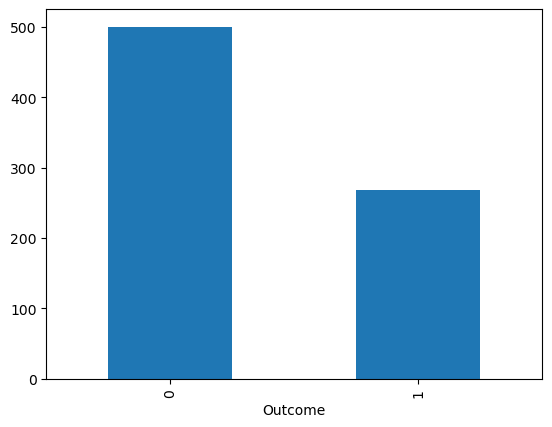

In [75]:
dframe["Outcome"].value_counts().plot(kind="bar")

Our target here is binary ,i.e., the Outcome.  
The above bar shows the number of patients who have(1) and don't have(0) diabetes.  

<Axes: >

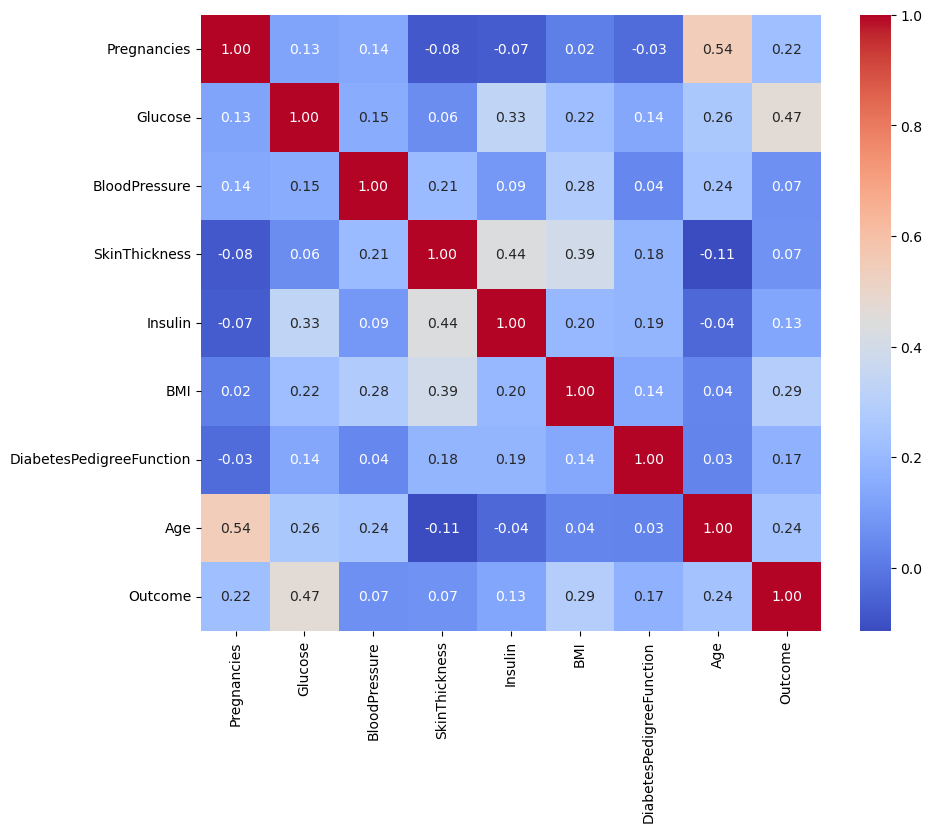

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matrix = dframe.corr()

plt.figure(figsize = (10 , 8))
sns.heatmap(cor_matrix , annot = True , cmap = "coolwarm" , fmt  = ".2f")

From the above heatmap , its clearly evident that Glucose has the most effect on the target.  
We'll start off using all the features in our logistic regression model then drop the ones that are highly correlated.



In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = dframe.drop("Outcome", axis = 1)
Y = dframe["Outcome"]

Lets also standardize because range of features like Insulin are very different from others.

In [78]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7922077922077922

Confusion Matrix:
 [[82 17]
 [15 40]]


79% , acceptable for logistic regression 

Now onto the second dataset , Top-Spotify-Songs-2023  
Let's start by loading the dataset and looking at the data  


In [274]:
dframe2 = pd.read_csv("spotify-2023.csv" , encoding="latin-1")
dframe2 = dframe2.drop(["track_name" , "artist(s)_name"] ,axis =1)

Dropped trackname as its(mostly) unique to each song.  
Artist names have some correlation as intuition suggests but with 100s of artists in the data and not many songs per artist , its better to exclude this as well.

In [275]:
dframe2.dtypes

artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Streams is being read as object and other supposedly numerical datatypes too.  
Also i encountered an error where in one of the rows of "streams" had an entry combined of all feature names?
below is handling of that error.

In [276]:
non_numeric = dframe2[~dframe2['streams'].astype(str).str.replace(',', '').str.isnumeric()]
print(non_numeric)

     artist_count  released_year  released_month  released_day  \
574             1           1970               1             1   

     in_spotify_playlists  in_spotify_charts  \
574                  2877                  0   

                                               streams  in_apple_playlists  \
574  BPM110KeyAModeMajorDanceability53Valence75Ener...                  16   

     in_apple_charts in_deezer_playlists  ...  bpm key   mode danceability_%  \
574                0                  54  ...  110   A  Major             53   

    valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
574        75        69               7                   0          17   

     speechiness_%  
574              3  

[1 rows x 22 columns]


Now we'll convert streams and the other features to integers.

In [277]:
dframe2 = dframe2.drop(574)
dframe2 = dframe2.dropna()
dframe2['streams'] = dframe2['streams'].astype(str).str.replace(',', '', regex=True).astype(int)
dframe2['in_deezer_playlists'] = dframe2['in_deezer_playlists'].astype(str).str.replace(',', '', regex=True).astype(int)
dframe2['in_shazam_charts'] = dframe2['in_shazam_charts'].astype(str).str.replace(',', '', regex=True).astype(int)
dframe2.dtypes

artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Let's see if the mode and key have any significant impact on streams.

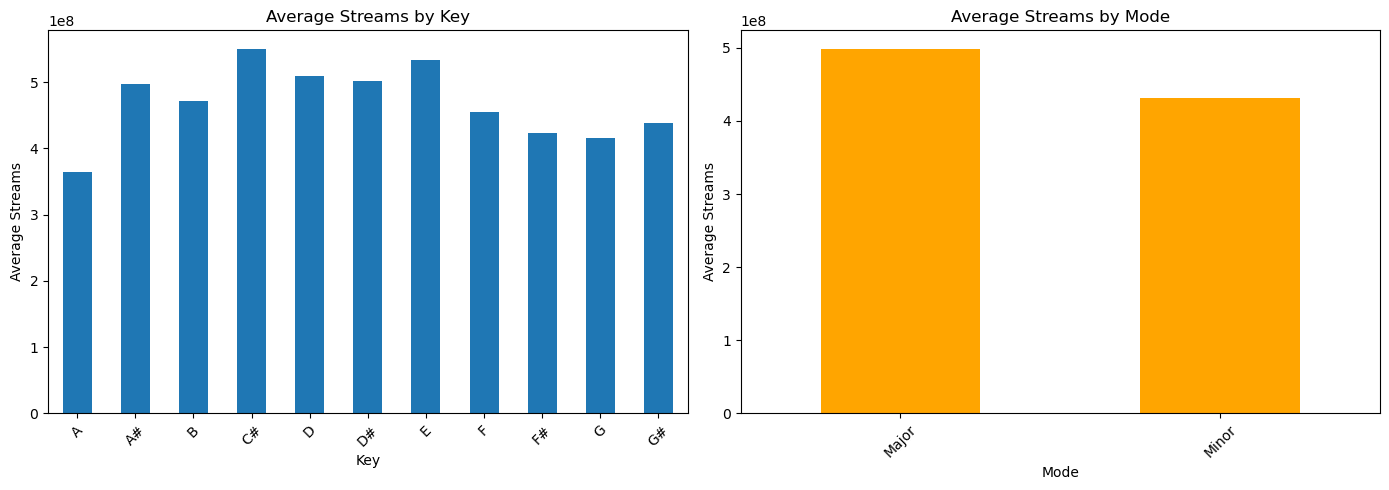

In [280]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dframe2.groupby("key")["streams"].mean().plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Streams by Key")
axes[0].set_ylabel("Average Streams")
axes[0].set_xlabel("Key")
axes[0].tick_params(axis='x', rotation=45)

dframe2.groupby("mode")["streams"].mean().plot(kind="bar", ax=axes[1], color='orange')
axes[1].set_title("Average Streams by Mode")
axes[1].set_ylabel("Average Streams")
axes[1].set_xlabel("Mode")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Clearly the key has no effect on the number of streams.  
The difference from mode is also minor.

<Axes: >

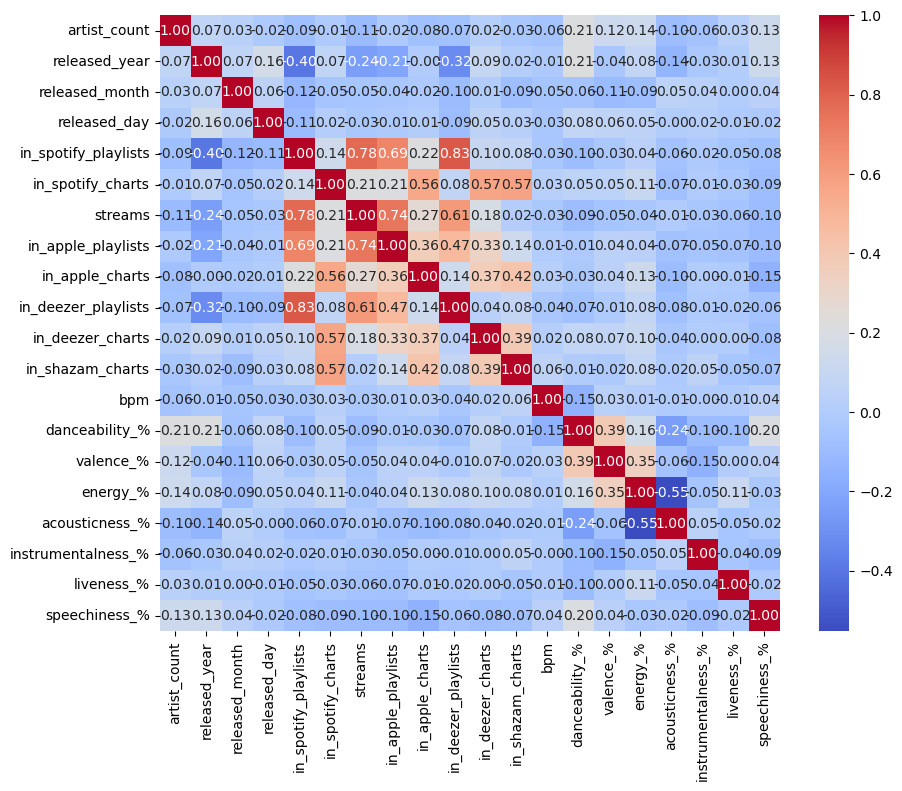

In [281]:
cor_matrix_2 = dframe2.select_dtypes(include='number').corr()

plt.figure(figsize = (10 , 8))
sns.heatmap(cor_matrix_2 , annot = True , cmap = "coolwarm" , fmt  = ".2f")

From the above heatmap , we can select the features with higher correlation with streams.  

In [297]:
X2 = dframe2[["in_spotify_playlists", "in_apple_playlists" ,"in_deezer_playlists"]]
y2 = dframe2["streams"]

In [303]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=None)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [304]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train2 , y_train2)

LinearRegression()

In [305]:
y_pred2 = model2.predict(X_test2)

In [306]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test2, y_pred2))
print("R² Score:", r2_score(y_test2, y_pred2))

MSE: 9.688284001229237e+16
R² Score: 0.6729655424849459


About ~60% average $R^2$ on different test-train shuffles